In [51]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np
import os
from model import detr_simplified, DETR
from cornell_dataset import CornellDataset
from view_bbox import draw_bbox

In [76]:
model = DETR()
loaded_model = torch.load("model_54.ckpt")

model.load_state_dict(loaded_model["model"])
model.eval()

DETR(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [77]:
from torch.utils.data import DataLoader 
dataset_path = "dataset/cornell"
img_set = "train"
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                        std=[0.229, 0.224, 0.225])
inv_normalize = transforms.Normalize(
                            mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
                            std=[1/0.229, 1/0.224, 1/0.225])
train_dataset = CornellDataset(dataset_path, "train", normalize)
val_dataset = CornellDataset(dataset_path, "val", normalize)

val_loader = DataLoader(val_dataset, batch_size=1, shuffle=True)
# for output bounding box post-processing
def box_cxcywh_to_xyxy(x):
    x_c, y_c, w, h = x.unbind(1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h),
         (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=1)

def rescale_bboxes(out_bbox, size):
    img_w, img_h = size
    b = box_cxcywh_to_xyxy(out_bbox).to("cpu")
    b = b * torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
    return b

torch.Size([1, 3, 224, 224])


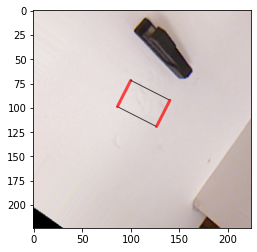

GT: tensor([14], dtype=torch.int32), tensor([[128,  44, 162,  64]], dtype=torch.uint8) Class: 14, bboxes: tensor([[ 90.5460,  80.2018, 135.7516, 110.5930]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

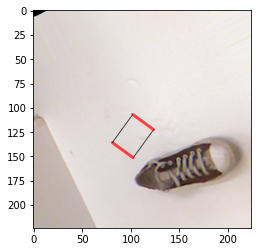

GT: tensor([3], dtype=torch.int32), tensor([[107, 159, 119, 170]], dtype=torch.uint8) Class: 5, bboxes: tensor([[ 84.2681, 115.7220, 120.0512, 142.2906]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

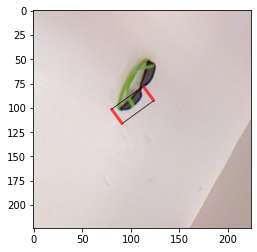

GT: tensor([8], dtype=torch.int32), tensor([[ 93,  83, 107, 107]], dtype=torch.uint8) Class: 7, bboxes: tensor([[ 81.7203,  87.6957, 121.9685, 106.0837]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

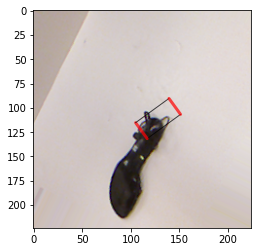

GT: tensor([7], dtype=torch.int32), tensor([[ 93, 138, 121, 159]], dtype=torch.uint8) Class: 7, bboxes: tensor([[106.7611, 100.7904, 149.2467, 121.0795]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

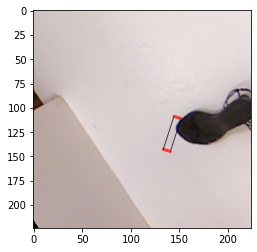

GT: tensor([3], dtype=torch.int32), tensor([[162, 106, 211, 123]], dtype=torch.uint8) Class: 3, bboxes: tensor([[124.6644, 122.9869, 160.3418, 130.6038]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

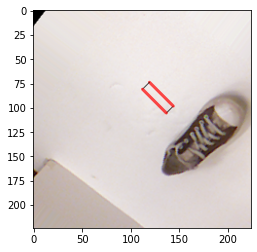

GT: tensor([6], dtype=torch.int32), tensor([[142, 160, 151, 174]], dtype=torch.uint8) Class: 6, bboxes: tensor([[132.8953,  72.0501, 122.7830, 106.7714]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

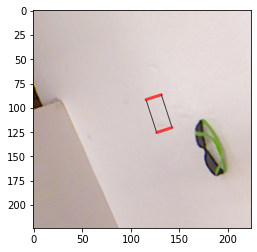

GT: tensor([13], dtype=torch.int32), tensor([[164, 114, 178, 138]], dtype=torch.uint8) Class: 19, bboxes: tensor([[111.1807,  97.5776, 146.7978, 114.1933]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

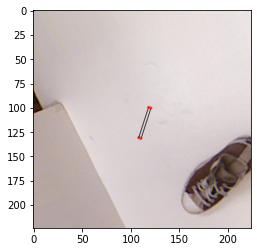

GT: tensor([5], dtype=torch.int32), tensor([[184, 145, 197, 159]], dtype=torch.uint8) Class: 3, bboxes: tensor([[ 97.9246, 114.1220, 130.8073, 116.7298]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

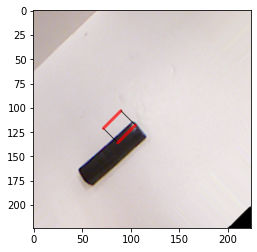

GT: tensor([5], dtype=torch.int32), tensor([[ 79, 120, 119, 146]], dtype=torch.uint8) Class: 16, bboxes: tensor([[ 77.6747, 106.5872,  98.6262, 132.2124]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

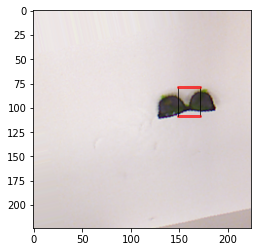

GT: tensor([3], dtype=torch.int32), tensor([[161,  85, 187, 104]], dtype=torch.uint8) Class: 1, bboxes: tensor([[145.0044,  81.9292, 175.0568, 105.2899]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

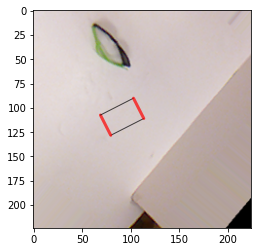

GT: tensor([16], dtype=torch.int32), tensor([[71, 46, 84, 57]], dtype=torch.uint8) Class: 8, bboxes: tensor([[ 71.8715,  97.3842, 110.0764, 120.8228]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

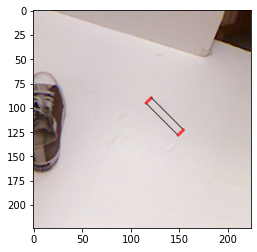

GT: tensor([0], dtype=torch.int32), tensor([[ 17, 118,  29, 132]], dtype=torch.uint8) Class: 16, bboxes: tensor([[111.5165, 104.8546, 158.2250, 112.7620]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

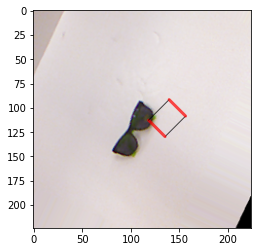

GT: tensor([6], dtype=torch.int32), tensor([[ 81, 130, 107, 148]], dtype=torch.uint8) Class: 6, bboxes: tensor([[122.3323,  98.5143, 152.2561, 122.5107]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

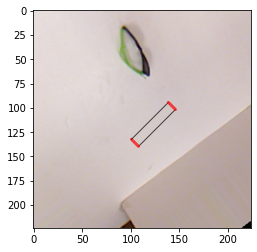

GT: tensor([15], dtype=torch.int32), tensor([[ 92,  51, 106,  62]], dtype=torch.uint8) Class: 6, bboxes: tensor([[ 96.3788, 111.8113, 150.1334, 122.1303]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

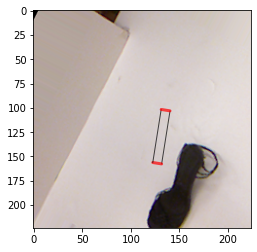

GT: tensor([7], dtype=torch.int32), tensor([[141, 161, 172, 173]], dtype=torch.uint8) Class: 2, bboxes: tensor([[103.7632, 125.0177, 159.1194, 134.2504]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

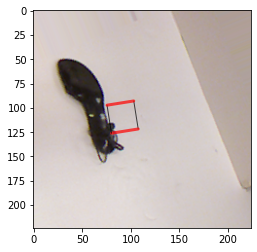

GT: tensor([12], dtype=torch.int32), tensor([[ 67, 116,  84, 129]], dtype=torch.uint8) Class: 0, bboxes: tensor([[ 76.8634,  95.4917, 106.1024, 123.3768]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

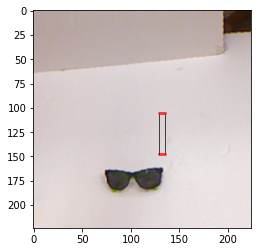

GT: tensor([2], dtype=torch.int32), tensor([[ 72, 164,  98, 182]], dtype=torch.uint8) Class: 1, bboxes: tensor([[110.7871, 123.1240, 152.8850, 129.8054]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

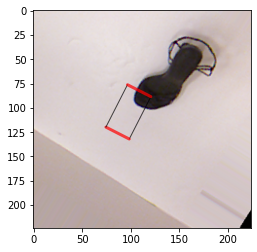

GT: tensor([6], dtype=torch.int32), tensor([[139,  41, 176,  63]], dtype=torch.uint8) Class: 4, bboxes: tensor([[ 72.9172,  90.5660, 121.9214, 117.5894]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

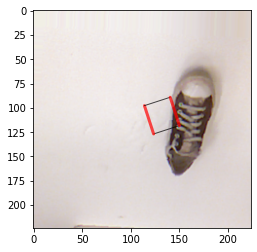

GT: tensor([10], dtype=torch.int32), tensor([[141, 162, 156, 174]], dtype=torch.uint8) Class: 9, bboxes: tensor([[118.0055,  92.5850, 145.9347, 123.2650]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

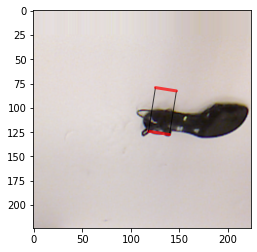

GT: tensor([19], dtype=torch.int32), tensor([[0, 0, 0, 0]], dtype=torch.uint8) Class: 2, bboxes: tensor([[109.8006,  92.3249, 155.3336, 114.2210]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

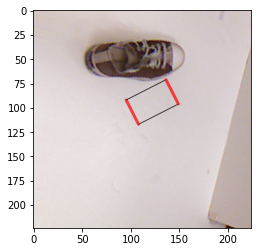

GT: tensor([19], dtype=torch.int32), tensor([[ 84,  39, 151,  56]], dtype=torch.uint8) Class: 8, bboxes: tensor([[ 99.0007,  79.8364, 145.0463, 107.9668]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

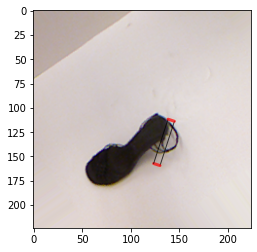

GT: tensor([5], dtype=torch.int32), tensor([[ 98, 126, 128, 138]], dtype=torch.uint8) Class: 3, bboxes: tensor([[110.1367, 132.0492, 158.1397, 138.9581]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

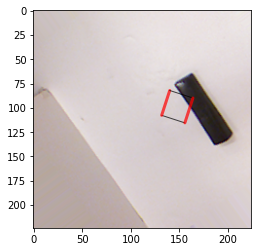

GT: tensor([13], dtype=torch.int32), tensor([[144,  68, 183,  94]], dtype=torch.uint8) Class: 13, bboxes: tensor([[135.2427,  85.2652, 160.3855, 112.1832]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

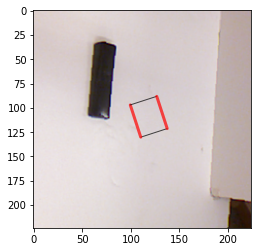

GT: tensor([9], dtype=torch.int32), tensor([[ 46,  82,  85, 108]], dtype=torch.uint8) Class: 9, bboxes: tensor([[104.0712,  91.6305, 132.7272, 126.5661]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

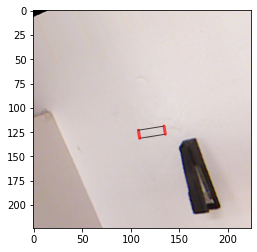

GT: tensor([12], dtype=torch.int32), tensor([[146, 159, 185, 177]], dtype=torch.uint8) Class: 10, bboxes: tensor([[108.2145, 120.8012, 134.9898, 129.2508]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

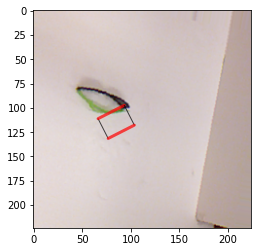

GT: tensor([1], dtype=torch.int32), tensor([[73, 82, 91, 96]], dtype=torch.uint8) Class: 18, bboxes: tensor([[ 73.4286,  99.2831,  96.3307, 129.5378]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

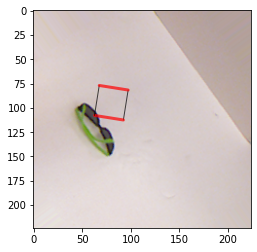

GT: tensor([14], dtype=torch.int32), tensor([[ 70, 123,  84, 146]], dtype=torch.uint8) Class: 2, bboxes: tensor([[ 64.2153,  79.5755,  95.4644, 109.7134]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

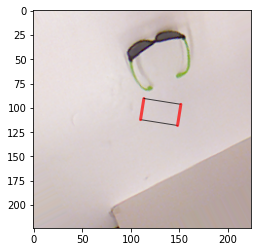

GT: tensor([4], dtype=torch.int32), tensor([[ 98,  30, 120,  49]], dtype=torch.uint8) Class: 12, bboxes: tensor([[111.4296,  93.1650, 150.0196, 115.2234]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

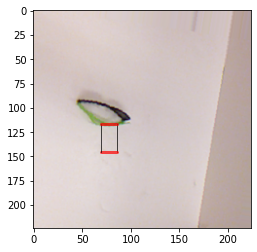

GT: tensor([1], dtype=torch.int32), tensor([[ 74,  95,  91, 109]], dtype=torch.uint8) Class: 1, bboxes: tensor([[ 62.9747, 122.7417,  91.6819, 139.8129]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

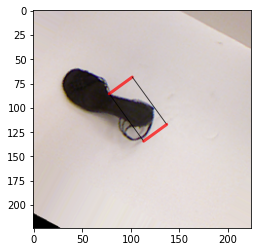

GT: tensor([16], dtype=torch.int32), tensor([[ 86,  94, 121, 115]], dtype=torch.uint8) Class: 17, bboxes: tensor([[ 77.1171,  86.5459, 137.4765, 115.9428]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

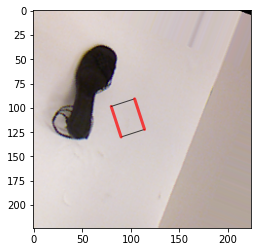

GT: tensor([8], dtype=torch.int32), tensor([[ 36,  96,  66, 108]], dtype=torch.uint8) Class: 9, bboxes: tensor([[ 84.2005,  93.7394, 109.5781, 126.8499]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

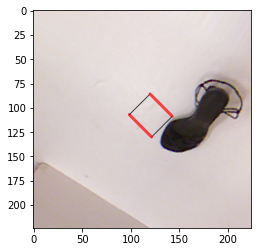

GT: tensor([6], dtype=torch.int32), tensor([[166,  85, 204, 107]], dtype=torch.uint8) Class: 6, bboxes: tensor([[105.4552,  91.5491, 135.6226, 124.0342]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

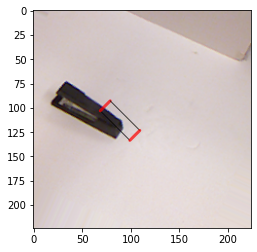

GT: tensor([16], dtype=torch.int32), tensor([[ 56, 106,  94, 129]], dtype=torch.uint8) Class: 16, bboxes: tensor([[ 67.2557, 105.8210, 110.3779, 120.3301]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

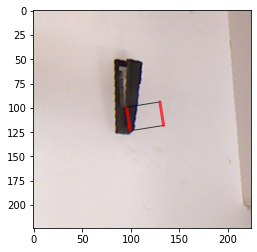

GT: tensor([10], dtype=torch.int32), tensor([[ 73,  99, 111, 122]], dtype=torch.uint8) Class: 10, bboxes: tensor([[ 97.2310,  96.3955, 132.0252, 120.9479]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

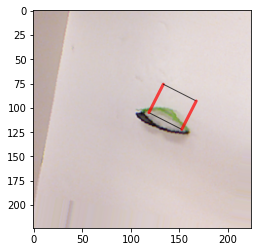

GT: tensor([1], dtype=torch.int32), tensor([[113, 109, 130, 123]], dtype=torch.uint8) Class: 14, bboxes: tensor([[123.9022,  82.4382, 161.9587, 115.2671]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

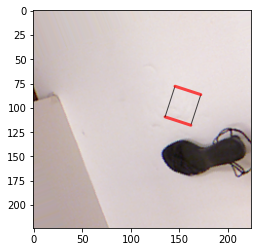

GT: tensor([3], dtype=torch.int32), tensor([[148, 140, 197, 158]], dtype=torch.uint8) Class: 3, bboxes: tensor([[137.0350,  83.7618, 170.2209, 111.7399]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

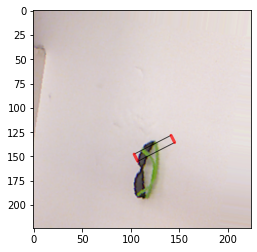

GT: tensor([10], dtype=torch.int32), tensor([[108, 134, 122, 157]], dtype=torch.uint8) Class: 8, bboxes: tensor([[102.8915, 145.7647, 145.5604, 137.4823]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

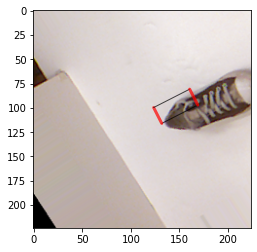

GT: tensor([4], dtype=torch.int32), tensor([[143, 113, 152, 128]], dtype=torch.uint8) Class: 8, bboxes: tensor([[125.3549,  89.1392, 167.0064, 107.5114]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

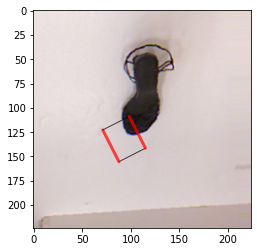

GT: tensor([10], dtype=torch.int32), tensor([[ 87,  80, 136,  98]], dtype=torch.uint8) Class: 8, bboxes: tensor([[ 77.6952, 113.7352, 108.3299, 150.4315]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

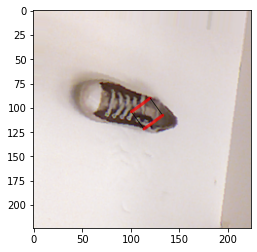

GT: tensor([18], dtype=torch.int32), tensor([[ 69,  93, 126, 111]], dtype=torch.uint8) Class: 17, bboxes: tensor([[105.7254,  93.8694, 127.6207, 117.7947]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

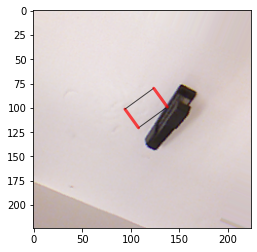

GT: tensor([7], dtype=torch.int32), tensor([[122, 101, 157, 121]], dtype=torch.uint8) Class: 7, bboxes: tensor([[ 97.3765,  88.1977, 134.0267, 112.0186]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

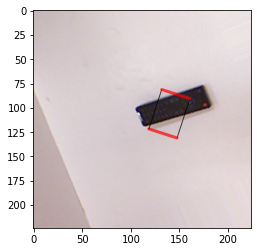

GT: tensor([3], dtype=torch.int32), tensor([[144,  85, 183, 103]], dtype=torch.uint8) Class: 3, bboxes: tensor([[118.3398,  90.7924, 160.9595, 121.2585]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

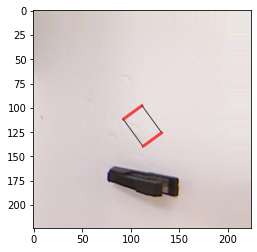

GT: tensor([18], dtype=torch.int32), tensor([[ 79, 161, 112, 181]], dtype=torch.uint8) Class: 17, bboxes: tensor([[ 94.6977, 106.6767, 129.2469, 130.5388]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

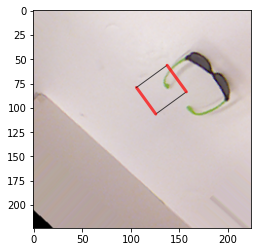

GT: tensor([4], dtype=torch.int32), tensor([[186,  73, 205,  87]], dtype=torch.uint8) Class: 7, bboxes: tensor([[111.9680,  64.2534, 150.9582,  98.1296]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

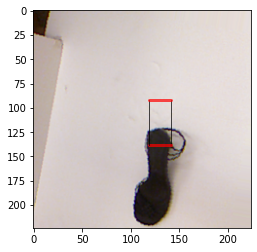

GT: tensor([9], dtype=torch.int32), tensor([[110, 131, 145, 151]], dtype=torch.uint8) Class: 1, bboxes: tensor([[106.7267, 103.8888, 153.0844, 126.8214]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

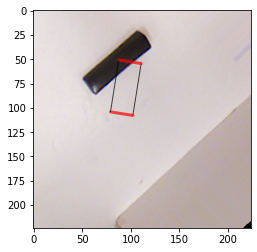

GT: tensor([5], dtype=torch.int32), tensor([[47, 54, 86, 80]], dtype=torch.uint8) Class: 2, bboxes: tensor([[ 67.6851,  67.4880, 121.8335,  90.8603]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

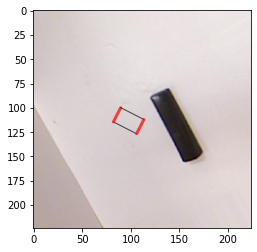

GT: tensor([12], dtype=torch.int32), tensor([[118,  83, 157, 109]], dtype=torch.uint8) Class: 14, bboxes: tensor([[ 84.2743, 104.9235, 111.1117, 121.4416]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

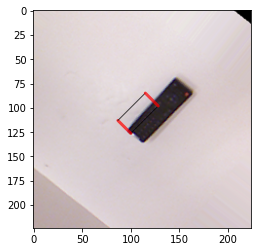

GT: tensor([6], dtype=torch.int32), tensor([[113,  89, 150, 115]], dtype=torch.uint8) Class: 6, bboxes: tensor([[ 87.4249,  96.0402, 127.3415, 114.8647]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

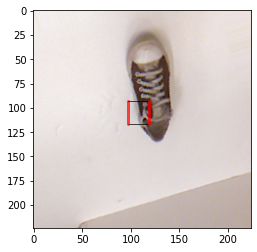

GT: tensor([12], dtype=torch.int32), tensor([[ 91,  75, 149,  93]], dtype=torch.uint8) Class: 11, bboxes: tensor([[ 96.9045,  92.7577, 119.0519, 116.1703]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

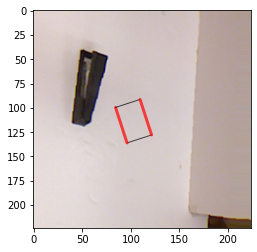

GT: tensor([9], dtype=torch.int32), tensor([[ 30,  90,  68, 113]], dtype=torch.uint8) Class: 9, bboxes: tensor([[ 89.4620,  94.4439, 116.0296, 132.8968]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

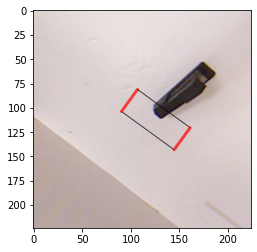

GT: tensor([5], dtype=torch.int32), tensor([[122,  83, 156, 103]], dtype=torch.uint8) Class: 15, bboxes: tensor([[ 92.1816,  98.0097, 159.2031, 126.0539]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

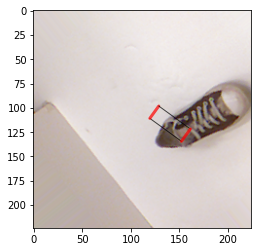

GT: tensor([5], dtype=torch.int32), tensor([[134, 133, 143, 148]], dtype=torch.uint8) Class: 15, bboxes: tensor([[120.2820, 108.3882, 160.5309, 124.0830]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

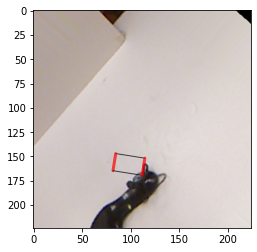

GT: tensor([0], dtype=torch.int32), tensor([[ 81, 188, 110, 209]], dtype=torch.uint8) Class: 12, bboxes: tensor([[ 82.7867, 167.1622, 113.1662, 149.2859]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

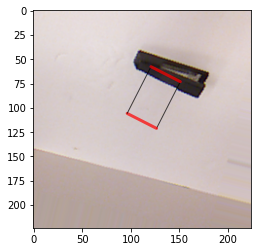

GT: tensor([17], dtype=torch.int32), tensor([[101,  41, 139,  65]], dtype=torch.uint8) Class: 4, bboxes: tensor([[ 96.5498,  72.3200, 150.5656, 106.2778]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

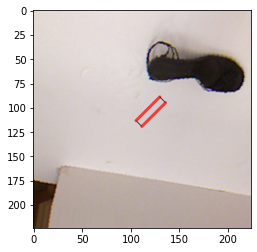

GT: tensor([18], dtype=torch.int32), tensor([[144,  52, 174,  69]], dtype=torch.uint8) Class: 16, bboxes: tensor([[116.3068,  86.5486, 124.7716, 121.2126]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

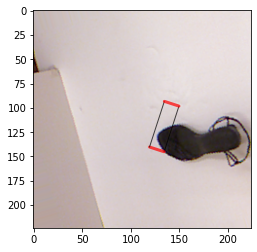

GT: tensor([2], dtype=torch.int32), tensor([[167, 128, 202, 143]], dtype=torch.uint8) Class: 3, bboxes: tensor([[109.6335, 111.2846, 159.0925, 127.1073]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

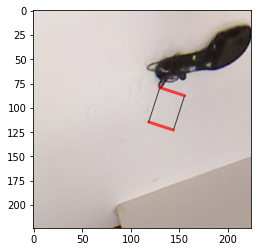

GT: tensor([3], dtype=torch.int32), tensor([[141,  57, 158,  70]], dtype=torch.uint8) Class: 3, bboxes: tensor([[118.2066,  87.5162, 155.4759, 114.3332]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

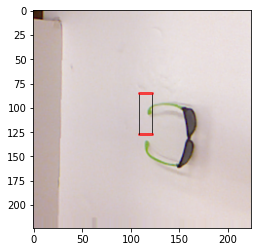

GT: tensor([10], dtype=torch.int32), tensor([[146, 143, 165, 157]], dtype=torch.uint8) Class: 1, bboxes: tensor([[ 94.0039,  98.9084, 136.8794, 112.5465]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

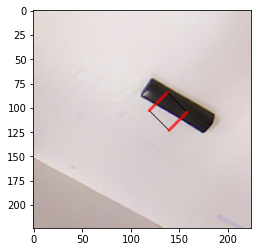

GT: tensor([16], dtype=torch.int32), tensor([[110,  71, 149,  97]], dtype=torch.uint8) Class: 16, bboxes: tensor([[124.0690,  90.3382, 152.8303, 116.7938]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

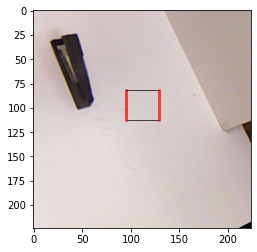

GT: tensor([12], dtype=torch.int32), tensor([[28, 73, 66, 96]], dtype=torch.uint8) Class: 11, bboxes: tensor([[ 94.8623,  81.6965, 128.7733, 112.3747]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

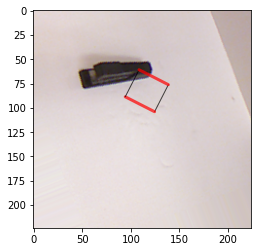

GT: tensor([2], dtype=torch.int32), tensor([[ 86,  54, 119,  74]], dtype=torch.uint8) Class: 4, bboxes: tensor([[100.7633,  65.3228, 132.0332,  99.2507]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

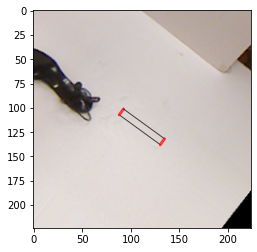

GT: tensor([0], dtype=torch.int32), tensor([[12, 63, 40, 84]], dtype=torch.uint8) Class: 15, bboxes: tensor([[ 85.2169, 115.7328, 137.4563, 123.2287]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

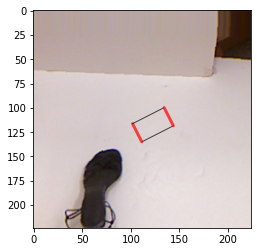

GT: tensor([9], dtype=torch.int32), tensor([[ 41, 195,  79, 218]], dtype=torch.uint8) Class: 8, bboxes: tensor([[104.5106, 106.8087, 140.9954, 127.8357]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

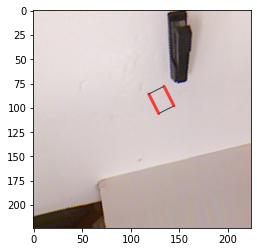

GT: tensor([10], dtype=torch.int32), tensor([[132,  45, 165,  65]], dtype=torch.uint8) Class: 8, bboxes: tensor([[122.5925,  80.4789, 140.2079, 103.0734]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

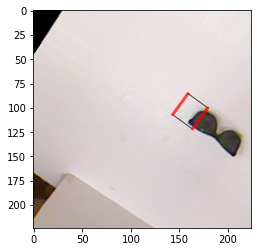

GT: tensor([14], dtype=torch.int32), tensor([[189, 127, 216, 145]], dtype=torch.uint8) Class: 15, bboxes: tensor([[148.5536,  90.0244, 173.7236, 116.9075]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

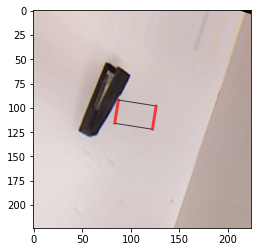

GT: tensor([7], dtype=torch.int32), tensor([[ 40, 101,  78, 124]], dtype=torch.uint8) Class: 12, bboxes: tensor([[ 85.0133,  94.7892, 124.3664, 119.0683]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

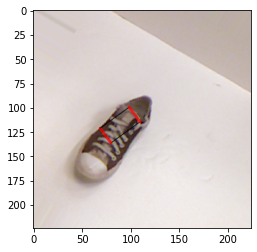

GT: tensor([7], dtype=torch.int32), tensor([[101,  83, 110,  98]], dtype=torch.uint8) Class: 7, bboxes: tensor([[ 70.4365, 108.2157, 107.2910, 127.0105]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

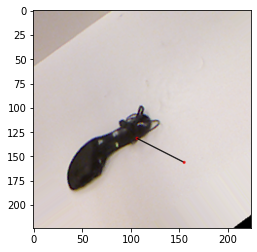

GT: tensor([4], dtype=torch.int32), tensor([[ 68, 123,  97, 144]], dtype=torch.uint8) Class: 14, bboxes: tensor([[103.2836, 143.5154, 157.9131, 143.9407]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

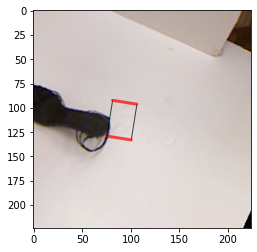

GT: tensor([0], dtype=torch.int32), tensor([[ 41, 106,  76, 126]], dtype=torch.uint8) Class: 2, bboxes: tensor([[ 72.1260,  99.9054, 109.4407, 125.2925]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

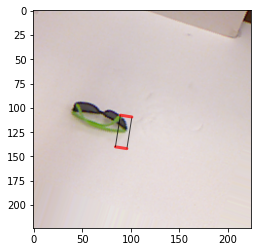

GT: tensor([18], dtype=torch.int32), tensor([[ 79, 100,  93, 124]], dtype=torch.uint8) Class: 2, bboxes: tensor([[ 76.0401, 118.7119, 109.0677, 130.7081]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

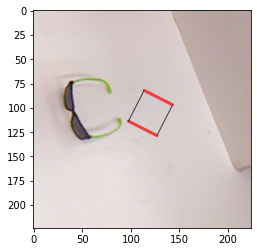

GT: tensor([2], dtype=torch.int32), tensor([[ 36, 110,  58, 129]], dtype=torch.uint8) Class: 4, bboxes: tensor([[102.4312,  88.7652, 137.9879, 121.6860]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

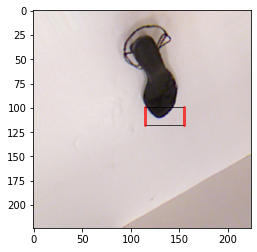

GT: tensor([12], dtype=torch.int32), tensor([[ 98,  32, 136,  54]], dtype=torch.uint8) Class: 11, bboxes: tensor([[114.1449,  99.4219, 154.4440, 117.0992]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

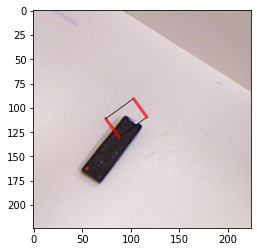

GT: tensor([6], dtype=torch.int32), tensor([[ 48, 148,  87, 166]], dtype=torch.uint8) Class: 7, bboxes: tensor([[ 77.6600,  98.5225, 112.9431, 122.0457]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

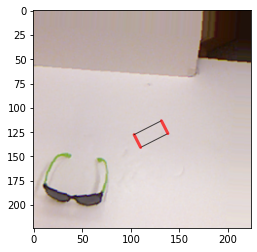

GT: tensor([8], dtype=torch.int32), tensor([[ 23, 184,  40, 199]], dtype=torch.uint8) Class: 8, bboxes: tensor([[104.9490, 119.5511, 136.5204, 134.3556]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

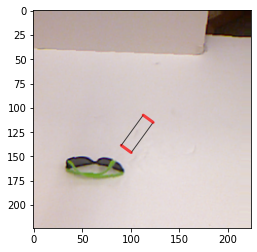

GT: tensor([1], dtype=torch.int32), tensor([[ 41, 145,  57, 161]], dtype=torch.uint8) Class: 5, bboxes: tensor([[ 87.2828, 120.3546, 125.7535, 133.0605]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

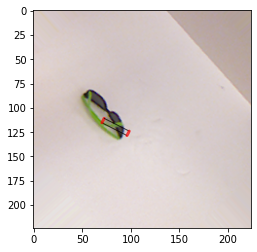

GT: tensor([15], dtype=torch.int32), tensor([[ 80, 106,  94, 130]], dtype=torch.uint8) Class: 14, bboxes: tensor([[ 69.7440, 117.0621,  98.7180, 122.1763]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

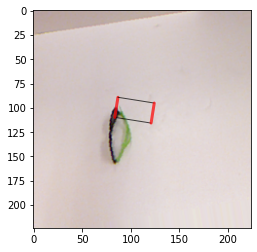

GT: tensor([12], dtype=torch.int32), tensor([[ 89, 112, 103, 123]], dtype=torch.uint8) Class: 12, bboxes: tensor([[ 84.8094,  91.8868, 122.6841, 112.7695]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

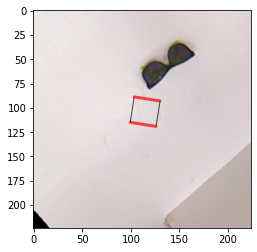

GT: tensor([4], dtype=torch.int32), tensor([[138,  36, 164,  54]], dtype=torch.uint8) Class: 2, bboxes: tensor([[101.4354,  90.3800, 127.9300, 117.3248]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

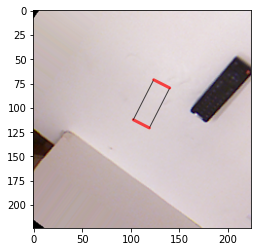

GT: tensor([6], dtype=torch.int32), tensor([[168,  79, 204,  97]], dtype=torch.uint8) Class: 4, bboxes: tensor([[ 98.1492,  86.5261, 144.3838, 105.0891]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

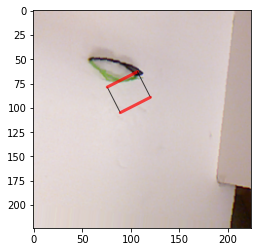

GT: tensor([1], dtype=torch.int32), tensor([[ 86,  49, 104,  63]], dtype=torch.uint8) Class: 18, bboxes: tensor([[ 83.1235,  66.3678, 112.6865, 101.2336]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

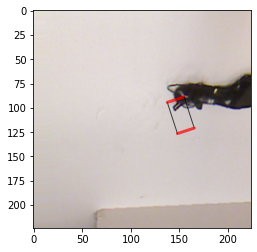

GT: tensor([0], dtype=torch.int32), tensor([[173,  76, 202,  97]], dtype=torch.uint8) Class: 19, bboxes: tensor([[134.5035,  98.4287, 168.3031, 116.6467]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

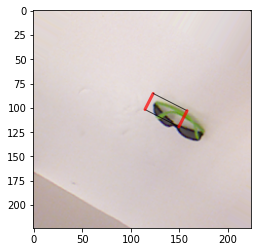

GT: tensor([17], dtype=torch.int32), tensor([[124,  96, 138, 119]], dtype=torch.uint8) Class: 14, bboxes: tensor([[116.5973,  92.9726, 155.7727, 111.5661]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

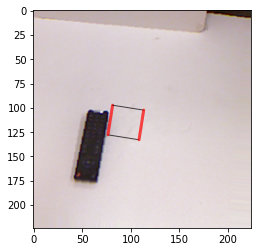

GT: tensor([9], dtype=torch.int32), tensor([[ 35, 149,  74, 168]], dtype=torch.uint8) Class: 12, bboxes: tensor([[ 78.5657,  99.5500, 110.9944, 130.4661]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

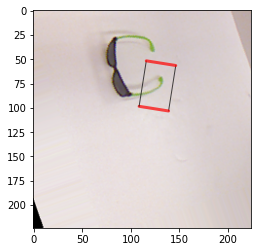

GT: tensor([2], dtype=torch.int32), tensor([[ 79,  66, 101,  85]], dtype=torch.uint8) Class: 2, bboxes: tensor([[103.6292,  61.9571, 151.0713,  92.6913]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

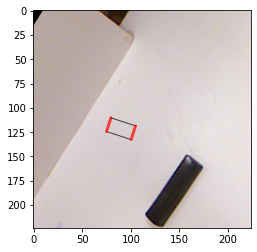

GT: tensor([6], dtype=torch.int32), tensor([[139, 154, 179, 180]], dtype=torch.uint8) Class: 13, bboxes: tensor([[ 76.5462, 114.0026, 103.2019, 128.8359]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

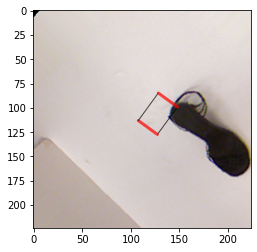

GT: tensor([15], dtype=torch.int32), tensor([[170, 127, 220, 143]], dtype=torch.uint8) Class: 5, bboxes: tensor([[110.2675,  93.8096, 145.3277, 118.1767]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

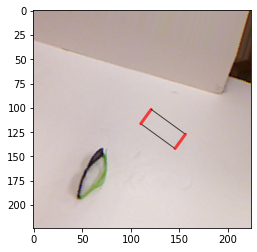

GT: tensor([9], dtype=torch.int32), tensor([[ 67, 158,  81, 169]], dtype=torch.uint8) Class: 15, bboxes: tensor([[111.3990, 112.5320, 154.9956, 130.8374]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

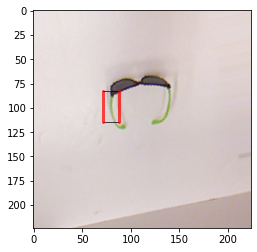

GT: tensor([2], dtype=torch.int32), tensor([[ 81,  69, 103,  88]], dtype=torch.uint8) Class: 11, bboxes: tensor([[ 70.8393,  82.2407,  87.6375, 114.6924]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

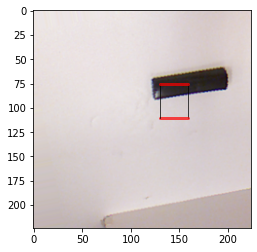

GT: tensor([2], dtype=torch.int32), tensor([[135,  63, 174,  87]], dtype=torch.uint8) Class: 1, bboxes: tensor([[126.8367,  78.4530, 162.3714, 106.8702]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

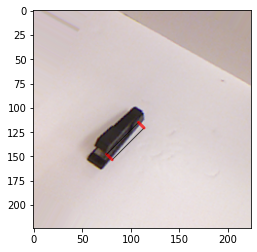

GT: tensor([6], dtype=torch.int32), tensor([[ 82, 108, 115, 128]], dtype=torch.uint8) Class: 6, bboxes: tensor([[ 71.0907, 130.1147, 117.5068, 138.2179]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

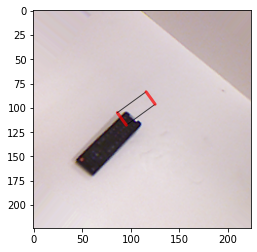

GT: tensor([5], dtype=torch.int32), tensor([[ 43, 141,  82, 159]], dtype=torch.uint8) Class: 7, bboxes: tensor([[ 87.1674,  92.6126, 123.8124, 108.5103]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

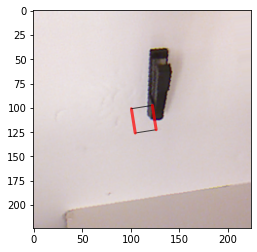

GT: tensor([10], dtype=torch.int32), tensor([[111,  66, 146,  87]], dtype=torch.uint8) Class: 10, bboxes: tensor([[102.3707,  98.9684, 124.2098, 124.3112]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

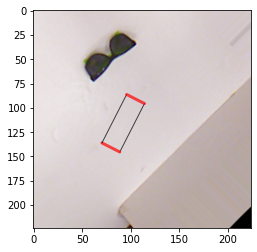

GT: tensor([4], dtype=torch.int32), tensor([[ 77,  25, 104,  43]], dtype=torch.uint8) Class: 4, bboxes: tensor([[ 64.0887, 105.4674, 120.0956, 126.0925]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

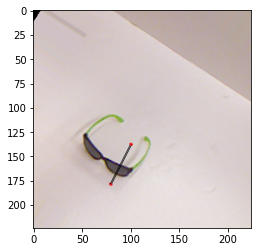

GT: tensor([5], dtype=torch.int32), tensor([[ 49, 132,  67, 146]], dtype=torch.uint8) Class: 4, bboxes: tensor([[ 66.6413, 157.4408, 112.8917, 158.5858]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

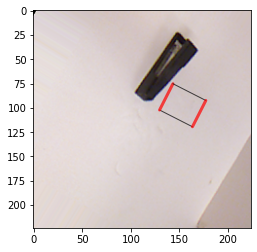

GT: tensor([6], dtype=torch.int32), tensor([[100,  65, 139,  88]], dtype=torch.uint8) Class: 14, bboxes: tensor([[134.3639,  82.0580, 172.3910, 112.4410]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

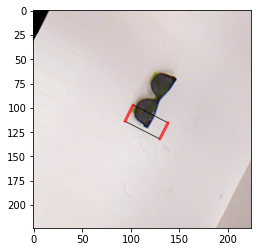

GT: tensor([6], dtype=torch.int32), tensor([[120,  66, 146,  84]], dtype=torch.uint8) Class: 14, bboxes: tensor([[ 95.9750, 105.1693, 136.2215, 123.8820]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

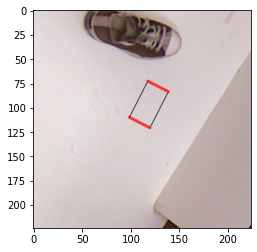

GT: tensor([17], dtype=torch.int32), tensor([[ 81,  16, 148,  33]], dtype=torch.uint8) Class: 4, bboxes: tensor([[ 97.6473,  84.5594, 139.4927, 108.3347]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

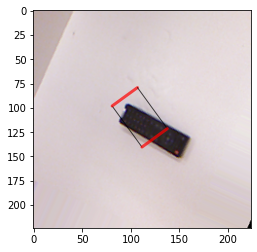

GT: tensor([16], dtype=torch.int32), tensor([[121, 125, 160, 143]], dtype=torch.uint8) Class: 17, bboxes: tensor([[ 82.9414,  93.5619, 135.2404, 125.8191]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

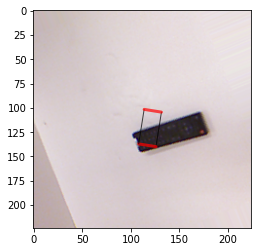

GT: tensor([3], dtype=torch.int32), tensor([[124, 112, 161, 138]], dtype=torch.uint8) Class: 2, bboxes: tensor([[101.7408, 111.6806, 137.7484, 129.7206]])
torch.Size([1, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

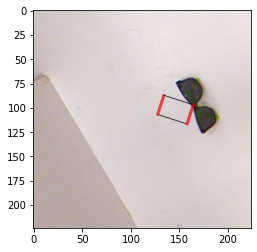

GT: tensor([12], dtype=torch.int32), tensor([[164, 103, 190, 121]], dtype=torch.uint8) Class: 13, bboxes: tensor([[130.0271,  91.3744, 161.8449, 112.1532]])


<Figure size 432x288 with 0 Axes>

In [88]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
for i, (x_val, y_val) in enumerate(val_loader):
    x_val = x_val.to(device)
    box = y_val
    bbox, labels = model(x_val)
    probas = labels.softmax(-1)
    probas = torch.argmax(probas, dim=2, keepdim=True)
    idx = torch.argmax(probas)
    pred_class = probas[:, idx].squeeze().cpu().numpy()

    bbox_pred = bbox[:, idx].detach().cpu() * 224

    #x_val = x_val.permute(0, 2, 3, 1)
    x_val = inv_normalize(x_val)
    print(x_val.shape)
    draw_func = draw_bbox(bbox_pred.squeeze(0).detach().cpu().numpy(), pred_class)
    draw_func.draw_rotated_box(x_val[0].permute(1, 2, 0).cpu().numpy())
    print(f"GT: {y_val[0]}, {y_val[1]} Class: {pred_class}, bboxes: {bbox_pred}")
    